# Z-test
https://en.wikipedia.org/wiki/Z-test

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st

In [10]:
MEAN_A = 10           # среднее значение в эксперименте A
MEAN_B = 12           # среднее значение в эксперименте B
POPULATION_STD = 10.  # задаем дисперсию в популяции
N_SAMPLES = 250       # число наблюдений в каждом из экспериментов

In [11]:
# Семплируем данные экспериментов
X_a = np.random.normal(loc=MEAN_A,
                       scale=POPULATION_STD,
                       size=N_SAMPLES)

X_b = np.random.normal(loc=MEAN_B,
                       scale=POPULATION_STD,
                       size=N_SAMPLES)

X_mean_a = np.mean(X_a)
X_mean_b = np.mean(X_b)

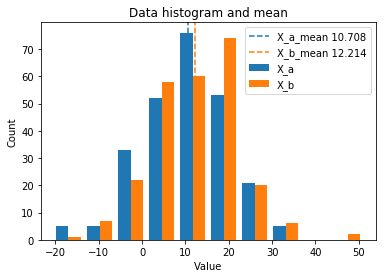

In [12]:
# Визуализируем данные экспериментов 
plt.hist([X_a, X_b])
plt.axvline(x=X_mean_a, color='C0', linestyle='--')
plt.axvline(x=X_mean_b, color='C1', linestyle='--')
plt.ylabel('Count')
plt.xlabel('Value')
plt.title('Data histogram and mean')
plt.legend(['X_a_mean %.3f' % X_mean_a,
            'X_b_mean %.3f' % X_mean_b,
            'X_a', 'X_b']);

In [13]:
# Оцениваем стандартную ошибку
se_a = se_b = POPULATION_STD / np.sqrt(N_SAMPLES)
se_ab = np.sqrt(se_a ** 2 + se_b ** 2)  # стандартная ошибка разности

Поймем, какой уровень значимости взять для критерия.

In [16]:
diff = (X_mean_b - X_mean_a)       # разность средних значений двух экспериментов
z = diff / se_ab                   # вычисляем z-статистику
z_quantile = st.norm.cdf(z)        # вычисляем квантиль z-статистики
print('diff=%.2f z=%.2f q=%.2f' % (diff, z, z_quantile))

diff=1.51 z=1.68 q=0.95


Посмотрели на результат, поэтому зафиксируем уровень значимости 0.05 (=1-0.95). Тогда критерий выглядит так: если z_quantile > 0.95, то отвергаем гипотезу о равенстве распределений.

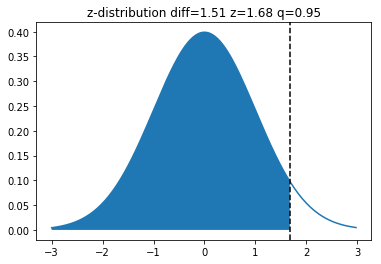

In [18]:
# Визуализируем z-распределение
x = np.arange(-3, 3, 0.025)
plt.plot(x, st.norm.pdf(x))
plt.axvline(z, color='k', linestyle='--')
plt.fill_between(x, st.norm.pdf(x), where=x<z)
plt.title('z-distribution diff=%.2f z=%.2f q=0.95' % (diff, z));

In [26]:
# TODO: проведите эксперимент и оцените долю ошибок критерия

from tqdm import tqdm_notebook

cnt = 0

for i in tqdm_notebook(range(1000)):
    X_a = np.random.normal(loc=MEAN_A,
                       scale=POPULATION_STD,
                       size=N_SAMPLES)

    X_b = np.random.normal(loc=MEAN_B,
                       scale=POPULATION_STD,
                       size=N_SAMPLES)

    X_mean_a = np.mean(X_a)
    X_mean_b = np.mean(X_b)
    
    diff = (X_mean_b - X_mean_a)       # разность средних значений двух экспериментов
    z = diff / se_ab                   # вычисляем z-статистику
    z_quantile = st.norm.cdf(z)        # вычисляем квантиль z-статистики

    if z_quantile > 0.95:
        cnt += 1
        
print('Мощность критерия:', cnt/1000)
print('Доля ошибок критерия (ошибка 2 рода):', 1-cnt/1000)


Мощность критерия: 0.74
Доля ошибок критерия (ошибка 2 рода): 0.26
